Name : Shadeeb Hossain

1. ***Step-1 ***Importing the libraries


In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


2. **Step-2 :**Loading the datasets

In [2]:
import tensorflow as tf
(Xtr,ytr),(Xts,yts)=tf.keras.datasets.mnist.load_data()
print('Xtr shape:%s' %str(Xtr.shape))
print('Xts shape:%s'%str (Xts.shape))
ntr=Xtr.shape[0]
nts=Xts.shape[0]
nrow=Xtr.shape[1]
ncol=Xtr.shape[2]


11490434/11490434 [==============================] - 0s 0us/step
Xtr shape:(60000, 28, 28)
Xts shape:(10000, 28, 28)


**3. Step-3 :**Scaling the datasets, so that value is between -1 to 1

In [3]:
npix=nrow*ncol
Xtr=2*(Xtr/255-0.5)
Xtr=Xtr.reshape(ntr,npix)
Xts=2*(Xts/255-0.5)
Xts=Xts.reshape(nts,npix)

**Step-4 :**Plotting function

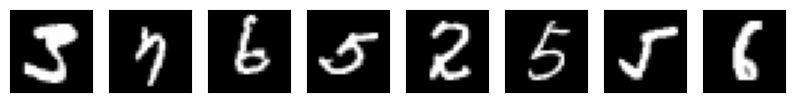

In [4]:
def plt_digit(ax,x):
  nrow=28
  ncol=28
  xsq=x.reshape(nrow,ncol)
  ax.imshow(xsq,cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])

#Select random digits

nplt=8
Iperm=np.random.permutation(ntr)


# Plot the images using subplot command
fig,ax=plt.subplots(1,nplt,figsize=(10,3))
for i in range(nplt):
  ind=Iperm[i]
  plt_digit(ax[i],Xtr[ind,:])

**Step-5 : **Logistic Regression

In [5]:
ntr1=5000
Xtr1=Xtr[Iperm[:ntr1]]
from sklearn import linear_model
clf=linear_model.LogisticRegression(verbose=1,solver='lbfgs', \
                                    max_iter=500)
clf.fit(Xtr1,ytr[Iperm[:ntr1]])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, verbose=1)

**Step-6** : Importing pickle- Since it takes long to run the optimizer

In [6]:
import pickle
with open('clf.pickle','wb') as f:
  pickle.dump(clf,f)

In [7]:
with open('clf.pickle','rb') as f:
  clf=pickle.load(f)

In [8]:
nts1=5000
Iperm_ts=np.random.permutation(nts)
Xts1=Xts[Iperm_ts[:nts1]]
yts1=yts[Iperm_ts[:nts1]]
yhat=clf.predict(Xts1)
acc=np.mean(yhat==yts1)
print('Accuracy:%f'%acc)

Accuracy:0.889400


**Step-7 :** Now let's visualize the data

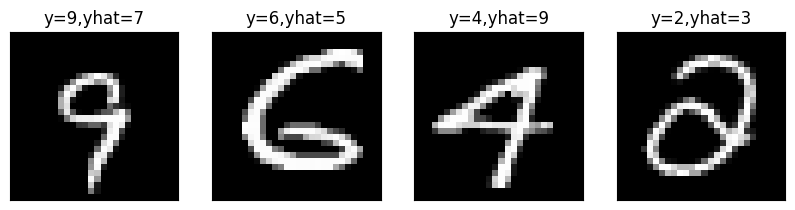

In [9]:
nplt=4
Ierr=np.where(yhat!=yts1)[0]
fig,ax=plt.subplots(1,nplt,figsize=(10,3))
for i in range(nplt):
  ind=Ierr[i]
  plt_digit(ax[i],Xts1[ind,:])
  title='y=%d,yhat=%d'%(yts1[ind],yhat[ind])
  ax[i].set_title(title)

**Step-8:** Creating a confusion matrix

[[461   0   5   1   1   7   2   1   1   3]
 [  0 537   4   2   0   4   0   1   9   0]
 [  3  10 437  17   9   4  10   9  17   2]
 [  4   4   7 433   0  24   0   8   9   6]
 [  1   3   4   3 457   2   5   4   6  25]
 [  5   5   4  21  10 373  10   4  10   8]
 [  7   3  10   1  14   6 435   1   2   0]
 [  0   6   9   5   6   0   0 451   1  17]
 [  7   8  10  16   8  22   2   8 412   6]
 [  8   2   1   5  19   3   0  20   6 451]]
[[0.95643154 0.         0.01037344 0.00207469 0.00207469 0.01452282
  0.00414938 0.00207469 0.00207469 0.00622407]
 [0.         0.96409336 0.00718133 0.00359066 0.         0.00718133
  0.         0.00179533 0.01615799 0.        ]
 [0.00579151 0.01930502 0.84362934 0.03281853 0.01737452 0.00772201
  0.01930502 0.01737452 0.03281853 0.003861  ]
 [0.00808081 0.00808081 0.01414141 0.87474747 0.         0.04848485
  0.         0.01616162 0.01818182 0.01212121]
 [0.00196078 0.00588235 0.00784314 0.00588235 0.89607843 0.00392157
  0.00980392 0.00784314 0.01176471 0.0490

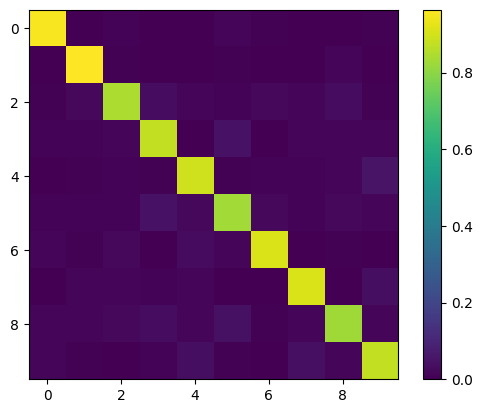

In [10]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yts1,yhat)
print(cm)

# Normalize the confusion matrix
Csum=np.sum(cm,1)
cmn=cm/Csum[:,np.newaxis]
print(cmn)

# Print the confusion matrix

print(np.array_str(cm,precision=3,suppress_small=True))
plt.imshow(cmn,interpolation='none')
plt.colorbar()

**Step-9** : Visualizing the weights .

Visualizing the weights for each digit will show a blurry version of the digit.

The bluriness is correlated to shifts, rotations and other variations.

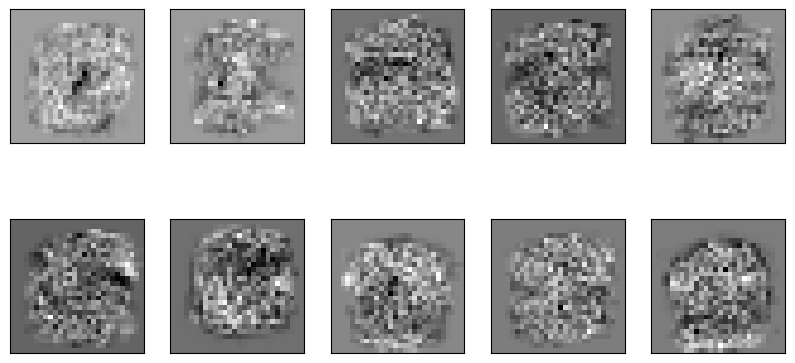

In [11]:
w=clf.coef_
ndigit=w.shape[0]
fig,ax=plt.subplots(2,5,figsize=(10,5))
for i in range (ndigit):
  irow = i // 5
  icol = i % 5
  plt_digit(ax[irow,icol],w[i,:])


**Step-10** : Finding digits that are '2' and not '2'.

In [ ]:

idig=2
Idig=np.where(yts==idig)[0]
Inotdig=np.where(yts!=idig)[0]
n=len(Idig)
Idig= Idig[np.random.permutation(n)]
n=len(Inotdig)
Inotdig=Inotdig[np.random.permutation(n)]

# Set the weight to the first digit

w=Xtr[Idig[0],:]
w=w/(np.sum(w**2))

# Finding the correlation with other digit '7'

nplot=7
fig,ax=plt.subplots(2,n,figsize=(12,6))
rho=np.zeros(nplot)
for i in range(nplot):
  #Get a true and false digit
  jo=Idig[i]
  j1=Inotdig[i]
  x0=Xtr[jo,:]
  x1=Xtr[j1,:]
  # Compute the correlation between the two digits
  rho0=w.dot(x0)
  rho1=w.dot(x1)
  plt_digit(ax[0,i],x0)
  ax[0,i].set_title('rho=%f'%rho0)
  plt_digit(ax[1,i],x1)
  ax[1,i].set_title('rho=%f'%rho1)

plt.tight_layout()



**Step-11 :** SVM classifier using Linear Kernel

In [13]:
from sklearn import svm
# Create a classifier , a support vector classifier

svc=svm.SVC(probability=False,kernel="linear",C=2.8, gamma=0.0073,verbose=10)

In [15]:
ntr1=5000
nts1=5000
Xtr1=Xtr[Iperm[:ntr1],:]
ytr1=ytr[Iperm[:ntr1]]
Xts1=Xts[Iperm_ts[:nts1],:]
yts1=yts[Iperm_ts[:nts1]]

svc.fit(Xtr1,ytr1)

[LibSVM]

SVC(C=2.8, gamma=0.0073, kernel='linear', verbose=10)

In [18]:
import pickle
with open('svc.pickle','wb') as fp:
  pickle.dump([svc,Xtr1,ytr1],fp)

In [19]:
import pickle
with open('svc.pickle','rb') as fp:
  [svc,Xtr1,ytr1]=pickle.load(fp)

**Step-12 :**Predicting and Measuring Accuracy using SVC

In [20]:
yhat_ts=svc.predict(Xts1)
acc=np.mean(yhat_ts==yts1)
print('Accuracy:%f'%acc)

Accuracy:0.908800
